<a href="https://colab.research.google.com/github/danielleitesoares/tccuea/blob/main/trim01_amazonia_kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <center>Universidade do Estado do Amazonas</center>
##### <center>Pós-graduação Lato Sensu em Ciência de Dados</center>
##### <center>Fundamentos de Machine Learning Aplicado II (Turma 02)</center>

<center>

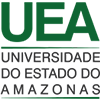

</center>

---

## <center>Código fonte do TCC: K-means para o Bioma Amazônia</center>
##### <center>**Professora:** Msc. Alice Adativa</center>
###### <center>**Aluno:** Daniel Erasmo Leite Soares</center>



---



## <center>Fonte de dados.</center>

[DB Queimadas do INPE.](https://queimadas.dgi.inpe.br/queimadas/bdqueimadas)


## Preparação do Ambiente

---



In [1]:
# Pacotes instalados
!pip install geopandas
!pip install contextily
!pip install biokit
!pip install plotly

In [2]:
## Bibliotecas de Tratamento de Dados
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import contextily
import numpy as np

## Bibliotecas Gráficas
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.graph_objects as go

## Bibliotecas de ML
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
#from sklearn.cluster import MeanShift
#from sklearn.cluster import estimate_bandwidth

## Carregamento e preparação do DataFrame de todos os Biomas

---



In [3]:
# Montando a pasta do Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# Criando os DataFrames de focos de queimadas do Brasil
alertas_2019 = pd.read_csv('/content/drive/MyDrive/TCC/dataset/meses_focos_biomas_2019-01-01_2019-12-31.csv')
alertas_2020 = pd.read_csv('/content/drive/MyDrive/TCC/dataset/meses_focos_biomas_2020-01-01_2020-12-31.csv')
alertas_2021 = pd.read_csv('/content/drive/MyDrive/TCC/dataset/meses_focos_biomas_2021-01-01_2021-12-31.csv')
alertas = [alertas_2019, alertas_2020, alertas_2021]
alertas_1921 = pd.concat(alertas)

## Carregamento e preparação do DataFrame somente do Bioma Amazônia

---



In [43]:
alertas_amazonia = alertas_1921[alertas_1921['bioma'] == 'Amazonia']

## Preparação do DataFrame com dados do 1º trimistre 2019

---



In [44]:
alertas_amazonia_201901 = alertas_amazonia[alertas_amazonia['mes'] == 1]
alertas_amazonia_201902 = alertas_amazonia[alertas_amazonia['mes'] == 2]
alertas_amazonia_201903 = alertas_amazonia[alertas_amazonia['mes'] == 3]

alertas_trim1_2019 = [alertas_amazonia_201901, alertas_amazonia_201902] #, alertas_amazonia_201903]
alertas_trim1_20192 = pd.concat(alertas_trim1_2019)

In [45]:
alertas_trim1_20192

,mes,datahora,satelite,pais,estado,municipio,bioma,diasemchuva,precipitacao,riscofogo,latitude,longitude,frp
304,1,2019/01/05 17:00:00,AQUA_M-T,Brasil,PARA,MOJU,Amazonia,0.0,0.4,0.0,-2.194,-48.728,7.2
305,1,2019/01/05 17:00:00,AQUA_M-T,Brasil,PARA,PRAINHA,Amazonia,0.0,0.5,0.4,-2.185,-53.864,26.8
306,1,2019/01/05 17:00:00,AQUA_M-T,Brasil,PARA,PRAINHA,Amazonia,0.0,0.2,0.4,-2.170,-53.687,15.7
307,1,2019/01/05 17:00:00,AQUA_M-T,Brasil,PARA,PRAINHA,Amazonia,0.0,0.3,0.4,-2.162,-53.700,42.3
308,1,2019/01/05 17:00:00,AQUA_M-T,Brasil,PARA,ORIXIMINA,Amazonia,5.0,0.4,0.0,-1.487,-56.108,14.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
101830,2,2021/02/26 17:55:00,AQUA_M-T,Brasil,AMAZONAS,JURUA,Amazonia,0.0,2.8,0.0,-4.278,-66.609,4.8
101833,2,2021/02/26 17:55:00,AQUA_M-T,Brasil,RORAIMA,BOA VISTA,Amazonia,2.0,0.1,0.8,2.813,-60.798,47.5
101836,2,2021/02/26 17:50:00,AQUA_M-T,Brasil,MATO GROSSO,NOVA MARINGA,Amazonia,2.0,18.7,0.0,-12.807,-57.303,13.8
101841,2,2021/02/26 17:55:00,AQUA_M-T,Brasil,RORAIMA,PACARAIMA,Amazonia,2.0,0.3,0.8,4.186,-60.632,16.6


## Preparação do DataFrame de todos os Biomas

---



In [46]:
geometry = [Point(xy) for xy in zip(alertas_trim1_20192['longitude'], alertas_trim1_20192['latitude'])]

In [47]:
alertas_trim1_20192 = gpd.GeoDataFrame(alertas_trim1_20192, crs='EPSG:4326', geometry=geometry)

In [48]:
type(alertas_trim1_20192)

geopandas.geodataframe.GeoDataFrame

In [50]:
alertas_trim1_20192

,mes,datahora,satelite,pais,estado,municipio,bioma,diasemchuva,precipitacao,riscofogo,latitude,longitude,frp,geometry
304,1,2019/01/05 17:00:00,AQUA_M-T,Brasil,PARA,MOJU,Amazonia,0.0,0.4,0.0,-2.194,-48.728,7.2,POINT (-48.72800 -2.19400)
305,1,2019/01/05 17:00:00,AQUA_M-T,Brasil,PARA,PRAINHA,Amazonia,0.0,0.5,0.4,-2.185,-53.864,26.8,POINT (-53.86400 -2.18500)
306,1,2019/01/05 17:00:00,AQUA_M-T,Brasil,PARA,PRAINHA,Amazonia,0.0,0.2,0.4,-2.170,-53.687,15.7,POINT (-53.68700 -2.17000)
307,1,2019/01/05 17:00:00,AQUA_M-T,Brasil,PARA,PRAINHA,Amazonia,0.0,0.3,0.4,-2.162,-53.700,42.3,POINT (-53.70000 -2.16200)
308,1,2019/01/05 17:00:00,AQUA_M-T,Brasil,PARA,ORIXIMINA,Amazonia,5.0,0.4,0.0,-1.487,-56.108,14.6,POINT (-56.10800 -1.48700)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101830,2,2021/02/26 17:55:00,AQUA_M-T,Brasil,AMAZONAS,JURUA,Amazonia,0.0,2.8,0.0,-4.278,-66.609,4.8,POINT (-66.60900 -4.27800)
101833,2,2021/02/26 17:55:00,AQUA_M-T,Brasil,RORAIMA,BOA VISTA,Amazonia,2.0,0.1,0.8,2.813,-60.798,47.5,POINT (-60.79800 2.81300)
101836,2,2021/02/26 17:50:00,AQUA_M-T,Brasil,MATO GROSSO,NOVA MARINGA,Amazonia,2.0,18.7,0.0,-12.807,-57.303,13.8,POINT (-57.30300 -12.80700)
101841,2,2021/02/26 17:55:00,AQUA_M-T,Brasil,RORAIMA,PACARAIMA,Amazonia,2.0,0.3,0.8,4.186,-60.632,16.6,POINT (-60.63200 4.18600)


In [51]:
alertas_trim1_20192 = alertas_trim1_20192.to_crs(crs='EPSG:3857')

In [52]:
alertas_trim1_20192.crs.to_string()

'EPSG:3857'

In [53]:
alertas_amazonia['estado'].unique()

array(['PARA', 'AMAZONAS', 'MATO GROSSO', 'MARANHAO', 'RONDONIA',
       'TOCANTINS', 'RORAIMA', 'ACRE', 'AMAPA'], dtype=object)

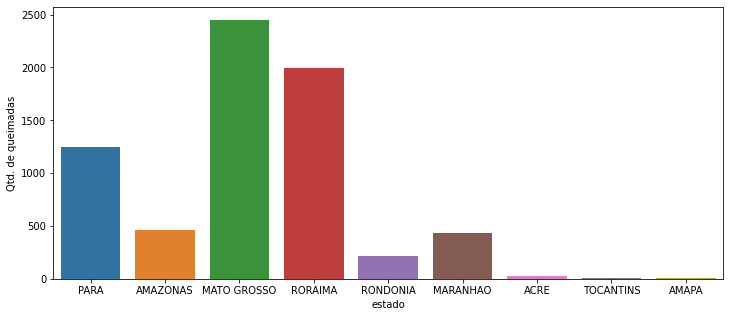

In [54]:
plt.figure(figsize=(12,5))
ax = sns.countplot(x='estado', data=alertas_trim1_20192)
ax.set_xlabel('estado')
ax.set_ylabel('Qtd. de queimadas')
plt.show()

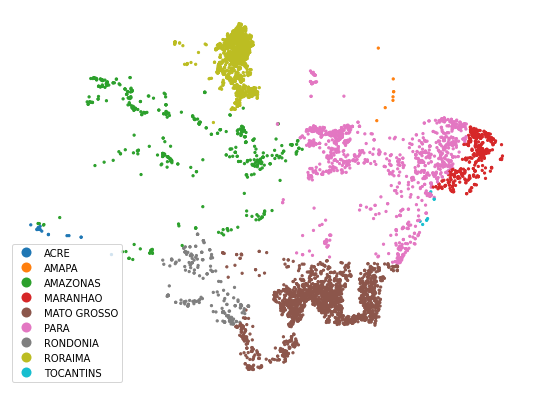

In [55]:
ax = alertas_trim1_20192.plot(figsize=(10, 7), column='estado', markersize=5, legend=True)
#contextily.add_basemap(ax)
ax.set_axis_off()
plt.show()

## **Aplicação dos Algoritmos para os Biomas**


*   K-Means

**K-Means Para o Bioma Amazônia**

In [56]:
coord_amazonia = alertas_trim1_20192.drop(columns=["datahora","satelite","pais","estado","municipio","bioma","diasemchuva","precipitacao","riscofogo","frp","geometry"])

In [ ]:
coord_amazonia

,latitude,longitude
23,-2194,-48728
24,-2185,-53864
25,-217,-53687
26,-2162,-537
27,-1487,-56108
...,...,...
4007,-2123,-54302
4013,2109,-60614
4017,-1956,-50714
4018,911,-67178


In [57]:
agrupadorK = KMeans(n_clusters=9)

In [58]:
agrupadorK.fit(coord_amazonia)

KMeans(n_clusters=9)

In [59]:
np.unique(agrupadorK.labels_)

array([0, 1, 2, 3, 4, 5, 6, 7, 8], dtype=int32)

In [60]:
coord_amazonia['Grupo'] = agrupadorK.labels_

In [61]:
coord_amazonia

,mes,latitude,longitude,Grupo
304,1,-2.194,-48.728,0
305,1,-2.185,-53.864,3
306,1,-2.170,-53.687,3
307,1,-2.162,-53.700,3
308,1,-1.487,-56.108,3
...,...,...,...,...
101830,2,-4.278,-66.609,4
101833,2,2.813,-60.798,7
101836,2,-12.807,-57.303,5
101841,2,4.186,-60.632,7


**Gráfico com agrupamento por Cluster**

In [62]:
from seaborn.utils import locator_to_legend_entries
c0lat = coord_amazonia[coord_amazonia['Grupo']==0]['latitude']
c0lon = coord_amazonia[coord_amazonia['Grupo']==0]['longitude']
c1lat = coord_amazonia[coord_amazonia['Grupo']==1]['latitude']
c1lon = coord_amazonia[coord_amazonia['Grupo']==1]['longitude']
c2lat = coord_amazonia[coord_amazonia['Grupo']==2]['latitude']
c2lon = coord_amazonia[coord_amazonia['Grupo']==2]['longitude']
c3lat = coord_amazonia[coord_amazonia['Grupo']==3]['latitude']
c3lon = coord_amazonia[coord_amazonia['Grupo']==3]['longitude']
c4lat = coord_amazonia[coord_amazonia['Grupo']==4]['latitude']
c4lon = coord_amazonia[coord_amazonia['Grupo']==4]['longitude']
c5lat = coord_amazonia[coord_amazonia['Grupo']==5]['latitude']
c5lon = coord_amazonia[coord_amazonia['Grupo']==5]['longitude']
c6lat = coord_amazonia[coord_amazonia['Grupo']==6]['latitude']
c6lon = coord_amazonia[coord_amazonia['Grupo']==6]['longitude']
c7lat = coord_amazonia[coord_amazonia['Grupo']==7]['latitude']
c7lon = coord_amazonia[coord_amazonia['Grupo']==7]['longitude']
c8lat = coord_amazonia[coord_amazonia['Grupo']==8]['latitude']
c8lon = coord_amazonia[coord_amazonia['Grupo']==8]['longitude']

x0 = c0lat 
y0 = c0lon
x1 = c1lat
y1 = c1lon
x2 = c2lat
y2 = c2lon
x3 = c3lat
y3 = c3lon
x4 = c4lat
y4 = c4lon
x5 = c5lat
y5 = c5lon
x6 = c6lat
y6 = c6lon
x7 = c7lat
y7 = c7lon
x8 = c8lat
y8 = c8lon

# Create figure
fig = go.Figure()

# Add traces
fig.add_trace(
    go.Scatter(
        x=x0,
        y=y0,
        mode="markers",
        marker=dict(color="paleturquoise")
    )
)

fig.add_trace(
    go.Scatter(
        x=x1,
        y=y1,
        mode="markers",
        marker=dict(color="limegreen")
    )
)

fig.add_trace(
    go.Scatter(
        x=x2,
        y=y2,
        mode="markers",
        marker=dict(color="tomato")
    )
)

fig.add_trace(
    go.Scatter(
        x=x3,
        y=y3,
        mode="markers",
        marker=dict(color="dodgerblue")
    )
)

fig.add_trace(
    go.Scatter(
        x=x4,
        y=y4,
        mode="markers",
        marker=dict(color="rebeccapurple")
    )
)

fig.add_trace(
    go.Scatter(
        x=x5,
        y=y5,
        mode="markers",
        marker=dict(color="yellow")
    )
)

fig.add_trace(
    go.Scatter(
        x=x6,
        y=y6,
        mode="markers",
        marker=dict(color="chartreuse")
    )
)

fig.add_trace(
    go.Scatter(
        x=x7,
        y=y7,
        mode="markers",
        marker=dict(color="chocolate")
    )
)

fig.add_trace(
    go.Scatter(
        x=x8,
        y=y8,
        mode="markers",
        marker=dict(color="red")
    )
)


# Add buttons that add shapes
cluster0 = [dict(type="circle",
                            xref="x", yref="y",
                            x0=min(x0), y0=min(y0),
                            x1=max(x0), y1=max(y0),
                            line=dict(color="paleturquoise"))]
cluster1 = [dict(type="circle",
                            xref="x", yref="y",
                            x0=min(x1), y0=min(y1),
                            x1=max(x1), y1=max(y1),
                            line=dict(color="limegreen"))]
cluster2 = [dict(type="circle",
                            xref="x", yref="y",
                            x0=min(x2), y0=min(y2),
                            x1=max(x2), y1=max(y2),
                            line=dict(color="tomato"))]
cluster3 = [dict(type="circle",
                            xref="x", yref="y",
                            x0=min(x3), y0=min(y3),
                            x1=max(x3), y1=max(y3),
                            line=dict(color="dodgerblue"))]
cluster4 = [dict(type="circle",
                            xref="x", yref="y",
                            x0=min(x4), y0=min(y4),
                            x1=max(x4), y1=max(y4),
                            line=dict(color="rebeccapurple"))]
cluster5 = [dict(type="circle",
                            xref="x", yref="y",
                            x0=min(x5), y0=min(y5),
                            x1=max(x5), y1=max(y5),
                            line=dict(color="yellow"))]
cluster6 = [dict(type="circle",
                            xref="x", yref="y",
                            x0=min(x6), y0=min(y6),
                            x1=max(x6), y1=max(y6),
                            line=dict(color="chartreuse"))]
cluster7 = [dict(type="circle",
                            xref="x", yref="y",
                            x0=min(x7), y0=min(y7),
                            x1=max(x7), y1=max(y7),
                            line=dict(color="chocolate"))]
cluster8 = [dict(type="circle",
                            xref="x", yref="y",
                            x0=min(x8), y0=min(y8),
                            x1=max(x8), y1=max(y8),
                            line=dict(color="red"))]
fig.update_layout(
    updatemenus=[
        dict(buttons=list([
            dict(label="None",
                 method="relayout",
                 args=["shapes", []]),
            dict(label="Cluster 0",
                 method="relayout",
                 args=["shapes", cluster0]),
            dict(label="Cluster 1",
                 method="relayout",
                 args=["shapes", cluster1]),
            dict(label="Cluster 2",
                 method="relayout",
                 args=["shapes", cluster2]),
            dict(label="Cluster 3",
                 method="relayout",
                 args=["shapes", cluster3]),
            dict(label="Cluster 4",
                 method="relayout",
                 args=["shapes", cluster4]),
            dict(label="Cluster 5",
                 method="relayout",
                 args=["shapes", cluster5]),
            dict(label="Cluster 6",
                 method="relayout",
                 args=["shapes", cluster6]),
            dict(label="Cluster 7",
                 method="relayout",
                 args=["shapes", cluster7]),
            dict(label="Cluster 8",
                 method="relayout",
                 args=["shapes", cluster8]),
            dict(label="All",
                 method="relayout",
                 args=["shapes", cluster0 + cluster1 + cluster2 + cluster3 + cluster4 + cluster5 + cluster6 + cluster7 + cluster8])
        ]),
        )
    ]
)

# Update remaining layout properties
fig.update_layout(
    title_text="Highlight Clusters",
    showlegend=True,
)
fig.show()
